# 5 klik: Feature Engineering PCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie2.csv',usecols=['klik', 'CYF_baner_pozycja', 'CYF_strona_id',
       'CYF_strona_domena', 'CYF_strona_kategoria', 'CYF_aplikacja_id',
       'CYF_aplikacja_domena', 'CYF_aplikacja_kategoria', 'CYF_urz_id',
       'CYF_urz_ip', 'CYF_urz_model', 'CYF_urz_typ', 'CYF_urz_polaczenie',
       'CYF_kat1', 'CYF_kat2', 'CYF_kat3', 'CYF_kat4', 'CYF_kat5', 'CYF_kat6',
       'CYF_kat7', 'CYF_kat8', 'CYF_kat9', 'CYF_data_godzina',
       'CYF_KL_strona_id', 'CYF_KL_aplikacja_id', 'CYF_KL_aplikacja_domena',
       'CYF_KL4_aplikacja_kategoria', 'CYF_KL0_aplikacja_kategoria',
       'CYF_KL_kat3', 'CYF_KL_kat4', 'CYF_KL1_kat6', 'CYF_KL2_kat6',
       'CYF_KL1_kat9', 'CYF_KL2_kat9', 'CYF_KL3_kat9', 'CYF_KL1_kat7', 'NZS1',
       'NZS2', 'NZS3', 'NZS4', 'NZS5', 'NZS6', 'NZS7', 'NZS8'],nrows=10000)
print(df.shape)
print()
print(df.columns)
df.head(5)

(10000, 44)

Index(['klik', 'CYF_baner_pozycja', 'CYF_strona_id', 'CYF_strona_domena',
       'CYF_strona_kategoria', 'CYF_aplikacja_id', 'CYF_aplikacja_domena',
       'CYF_aplikacja_kategoria', 'CYF_urz_id', 'CYF_urz_ip', 'CYF_urz_model',
       'CYF_urz_typ', 'CYF_urz_polaczenie', 'CYF_kat1', 'CYF_kat2', 'CYF_kat3',
       'CYF_kat4', 'CYF_kat5', 'CYF_kat6', 'CYF_kat7', 'CYF_kat8', 'CYF_kat9',
       'CYF_data_godzina', 'CYF_KL_strona_id', 'CYF_KL_aplikacja_id',
       'CYF_KL_aplikacja_domena', 'CYF_KL4_aplikacja_kategoria',
       'CYF_KL0_aplikacja_kategoria', 'CYF_KL_kat3', 'CYF_KL_kat4',
       'CYF_KL1_kat6', 'CYF_KL2_kat6', 'CYF_KL1_kat9', 'CYF_KL2_kat9',
       'CYF_KL3_kat9', 'CYF_KL1_kat7', 'NZS1', 'NZS2', 'NZS3', 'NZS4', 'NZS5',
       'NZS6', 'NZS7', 'NZS8'],
      dtype='object')


,klik,CYF_baner_pozycja,CYF_strona_id,CYF_strona_domena,CYF_strona_kategoria,CYF_aplikacja_id,CYF_aplikacja_domena,CYF_aplikacja_kategoria,CYF_urz_id,CYF_urz_ip,...,CYF_KL3_kat9,CYF_KL1_kat7,NZS1,NZS2,NZS3,NZS4,NZS5,NZS6,NZS7,NZS8
0,0,0,1773,3205,6,4718,134,4,307295,882768,...,0,0,7,2,0,2,2,-1,4,17
1,0,0,406,3944,2,4353,123,0,307295,665652,...,0,0,7,9,0,2,2,1,3,12
2,0,0,1156,3252,4,4353,123,0,307295,793161,...,0,0,7,9,0,2,2,1,3,12
3,0,1,2948,2050,22,4353,123,0,307295,873350,...,0,0,1,-1,1,1,2,2,2,7
4,0,0,1773,3205,6,1066,36,24,117056,1442509,...,0,0,7,2,0,2,2,0,4,17


In [2]:
df.dtypes

klik                           int64
CYF_baner_pozycja              int64
CYF_strona_id                  int64
CYF_strona_domena              int64
CYF_strona_kategoria           int64
CYF_aplikacja_id               int64
CYF_aplikacja_domena           int64
CYF_aplikacja_kategoria        int64
CYF_urz_id                     int64
CYF_urz_ip                     int64
CYF_urz_model                  int64
CYF_urz_typ                    int64
CYF_urz_polaczenie             int64
CYF_kat1                       int64
CYF_kat2                       int64
CYF_kat3                       int64
CYF_kat4                       int64
CYF_kat5                       int64
CYF_kat6                       int64
CYF_kat7                       int64
CYF_kat8                       int64
CYF_kat9                       int64
CYF_data_godzina               int64
CYF_KL_strona_id               int64
CYF_KL_aplikacja_id            int64
CYF_KL_aplikacja_domena        int64
CYF_KL4_aplikacja_kategoria    int64
C

### <span style="color:blue">Podział na zbiór testowy i wynikowy</span>

In [3]:
y = df['klik']
X = df.drop('klik', axis=1)

In [4]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (6700, 43)
Zbiór X testowy:     (3300, 43)
Zbiór y treningowy:  (6700,)
Zbiór y testowy:     (3300,)


### <span style="color:blue">OVERSAMPLING</span>

In [5]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  5548
ytrain = 1:  1152


In [6]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ilość -0 klik na -1 klik: ', Proporcja)

Ilość -0 klik na -1 klik:  5


In [7]:
ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_OV.count()

5760

Powiękrzyliśmy ilość zmiennych wynikowych 1. Teraz mamy tę samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych. Teraz wprowadzamy nowe, dodatkowe zmienne 1 do zbioru treningowego.

In [8]:
Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
ytrain_OV.count()

5760

In [9]:
ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)

#print("ilość elementów w zbiorze Xtrain:     ", Xtrain.CYF_data_godzina.count())
#print("ilość elementów w zbiorze Xtrain_OV:  ", Xtrain_OV.CYF_data_godzina.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OV:  ", ytrain_OV.count())

ilość elementów w zbiorze ytrain:      6700
ilość elementów w zbiorze ytrain_OV:   12460


Poziom zbilansowania zbioru wynikowego:

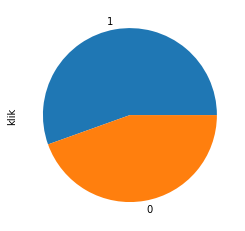

In [10]:
ytrain_OV.value_counts(dropna = False, normalize=True).plot(kind='pie')

In [11]:
Xtest.isnull().sum()

CYF_baner_pozycja              0
CYF_strona_id                  0
CYF_strona_domena              0
CYF_strona_kategoria           0
CYF_aplikacja_id               0
CYF_aplikacja_domena           0
CYF_aplikacja_kategoria        0
CYF_urz_id                     0
CYF_urz_ip                     0
CYF_urz_model                  0
CYF_urz_typ                    0
CYF_urz_polaczenie             0
CYF_kat1                       0
CYF_kat2                       0
CYF_kat3                       0
CYF_kat4                       0
CYF_kat5                       0
CYF_kat6                       0
CYF_kat7                       0
CYF_kat8                       0
CYF_kat9                       0
CYF_data_godzina               0
CYF_KL_strona_id               0
CYF_KL_aplikacja_id            0
CYF_KL_aplikacja_domena        0
CYF_KL4_aplikacja_kategoria    0
CYF_KL0_aplikacja_kategoria    0
CYF_KL_kat3                    0
CYF_KL_kat4                    0
CYF_KL1_kat6                   0
CYF_KL2_ka

### Normalizacja danych (standaryzacja)

PCA działa najlepiej ze znormalizowanym zestawem funkcji. Przeprowadzimy standardową normalizację skalarną, aby znormalizować nasz zestaw funkcji. 

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

### BoostCat

In [14]:
import warnings
warnings.filterwarnings("ignore")

    # load libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from catboost import CatBoostClassifier



model = CatBoostClassifier()
parameters = {'depth'         : sp_randInt(4, 10),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 100)
                 }

randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(Xtrain_OV, ytrain_OV)

    # Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
print("\n ========================================================")

0:	learn: 0.6287043	total: 33ms	remaining: 2.21s
1:	learn: 0.5832906	total: 71.4ms	remaining: 2.36s
2:	learn: 0.5551828	total: 109ms	remaining: 2.36s
3:	learn: 0.5360305	total: 143ms	remaining: 2.29s
4:	learn: 0.5292613	total: 175ms	remaining: 2.21s
5:	learn: 0.5163919	total: 212ms	remaining: 2.19s
6:	learn: 0.5076527	total: 250ms	remaining: 2.17s
7:	learn: 0.4988518	total: 295ms	remaining: 2.21s
8:	learn: 0.4900057	total: 335ms	remaining: 2.2s
9:	learn: 0.4739896	total: 373ms	remaining: 2.16s
10:	learn: 0.4641634	total: 409ms	remaining: 2.12s
11:	learn: 0.4576264	total: 444ms	remaining: 2.07s
12:	learn: 0.4490268	total: 491ms	remaining: 2.08s
13:	learn: 0.4409827	total: 534ms	remaining: 2.06s
14:	learn: 0.4296439	total: 574ms	remaining: 2.03s
15:	learn: 0.4148181	total: 610ms	remaining: 1.98s
16:	learn: 0.4038509	total: 646ms	remaining: 1.94s
17:	learn: 0.3952697	total: 681ms	remaining: 1.89s
18:	learn: 0.3843595	total: 727ms	remaining: 1.87s
19:	learn: 0.3754215	total: 774ms	remainin